60000
10000
10000
torch.Size([1, 28, 28]) 5
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
    

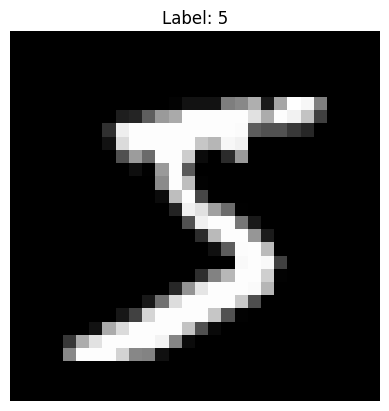

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt



transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_indices, _ = train_test_split(range(len(train_dataset)), train_size=10000, stratify=train_dataset.targets, random_state=42)
train_subset = Subset(train_dataset, train_indices)

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(len(train_dataset))
print(len(train_subset))
print(len(test_dataset))
img,label=train_dataset[0]

print(img.shape,label)
print(img)

smpl_img=img.squeeze().numpy()

plt.imshow(smpl_img, cmap='gray')  
plt.title(f'Label: {label}')
plt.axis('off') 
plt.show()


In [2]:

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x


model = MLP()
untrained_model=model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [3]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=600):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


train_model(model, train_loader, criterion, optimizer)

Epoch [1/600], Loss: 1.3219
Epoch [2/600], Loss: 0.4850
Epoch [3/600], Loss: 0.3848
Epoch [4/600], Loss: 0.3319
Epoch [5/600], Loss: 0.3085
Epoch [6/600], Loss: 0.2675
Epoch [7/600], Loss: 0.2425
Epoch [8/600], Loss: 0.2291
Epoch [9/600], Loss: 0.2072
Epoch [10/600], Loss: 0.1936
Epoch [11/600], Loss: 0.1772
Epoch [12/600], Loss: 0.1623
Epoch [13/600], Loss: 0.1517
Epoch [14/600], Loss: 0.1630
Epoch [15/600], Loss: 0.1297
Epoch [16/600], Loss: 0.1271
Epoch [17/600], Loss: 0.1271
Epoch [18/600], Loss: 0.1170
Epoch [19/600], Loss: 0.1155
Epoch [20/600], Loss: 0.1157
Epoch [21/600], Loss: 0.0994
Epoch [22/600], Loss: 0.0978
Epoch [23/600], Loss: 0.0963
Epoch [24/600], Loss: 0.0858
Epoch [25/600], Loss: 0.0970
Epoch [26/600], Loss: 0.0939
Epoch [27/600], Loss: 0.0656
Epoch [28/600], Loss: 0.0810
Epoch [29/600], Loss: 0.0884
Epoch [30/600], Loss: 0.0737
Epoch [31/600], Loss: 0.0661
Epoch [32/600], Loss: 0.0570
Epoch [33/600], Loss: 0.0560
Epoch [34/600], Loss: 0.0536
Epoch [35/600], Loss: 0

In [4]:

def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    return np.array(all_labels), np.array(all_preds)

labels, preds = evaluate_model(model, test_loader)


f1 = f1_score(labels, preds, average='weighted')
conf_matrix = confusion_matrix(labels, preds)

print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')


F1 Score: 0.9446
Confusion Matrix:
[[ 967    0    1    0    0    2    3    2    5    0]
 [   0 1119    4    0    0    0    3    2    6    1]
 [   5    2  960   19    9    6    9    8   11    3]
 [   2    0    9  947    0   16    0   11   17    8]
 [   3    0    5    1  925    2   10    2    4   30]
 [   8    5    3   19    0  828    5    3   14    7]
 [   9    3    5    1   16   14  905    2    3    0]
 [   1    9   13    9    4    1    0  969    5   17]
 [   4    7    5   17    6   10   11   14  894    6]
 [   5    2    3    7   20    4    2   20   13  933]]


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

# Flatten the images for Logistic Regression
X_train = np.array([train_subset[i][0].view(-1).numpy() for i in range(len(train_subset))])  # Convert tensor to numpy
y_train = np.array([train_subset[i][1] for i in range(len(train_subset))])  # No need to call .item()

X_test = np.array([test_dataset[i][0].view(-1).numpy() for i in range(len(test_dataset))])  # Flatten test images
y_test = np.array([test_dataset[i][1] for i in range(len(test_dataset))])  # No need to call .item()

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Compute F1-score and confusion matrix for Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Output results
print(f"Logistic Regression F1-score: {f1_logreg}")
print(f"Confusion Matrix:\n{conf_matrix_logreg}")

Logistic Regression F1-score: 0.8908980146870054
Confusion Matrix:
[[ 943    0    3    1    0   24    6    2    1    0]
 [   0 1106    5    0    0    3    4    3   13    1]
 [  15   19  870   37   16   10   13   10   39    3]
 [   4    4   26  893    3   30    4   14   23    9]
 [   7    2    8    2  896    3   11    7    8   38]
 [  17    2   13   39   12  731   16   10   44    8]
 [  16    4   15    1   13   19  884    3    3    0]
 [   2   13   18    9    7    2    0  932    3   42]
 [  12   14   18   46   11   45   12   15  790   11]
 [   9    5    4   14   46   10    0   32    6  883]]


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the full MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Use a stratified subset of training data (10,000 samples)
train_indices, _ = train_test_split(
    range(len(train_dataset)),
    train_size=10000,
    stratify=train_dataset.targets.numpy(),
    random_state=42
)
train_subset = Subset(train_dataset, train_indices)

# Flatten the images for Random Forest
X_train = np.array([train_subset[i][0].view(-1).numpy() for i in range(len(train_subset))])  # Convert tensor to numpy
y_train = np.array([train_subset[i][1] for i in range(len(train_subset))])  # No need to call .item()

X_test = np.array([test_dataset[i][0].view(-1).numpy() for i in range(len(test_dataset))])  # Flatten test images
y_test = np.array([test_dataset[i][1] for i in range(len(test_dataset))])  # No need to call .item()

# Train Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Compute F1-score and confusion matrix for Random Forest
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Output results
print(f"Random Forest F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

Random Forest F1-score: 0.9514034359305672
Confusion Matrix:
[[ 968    0    0    0    0    3    2    1    6    0]
 [   0 1120    2    5    1    1    3    0    2    1]
 [  10    0  972    9    9    1    7   14    9    1]
 [   4    1   16  953    0   10    1   10   10    5]
 [   2    0    3    0  936    0    6    2    3   30]
 [   5    2    1   21    5  834    9    1    7    7]
 [  13    4    1    0    4    6  926    0    3    1]
 [   2    6   26    1    3    0    0  964    2   24]
 [   4    1    6   16    6    9    8    4  903   17]
 [   7    6    1   17   17    3    4    6    6  942]]


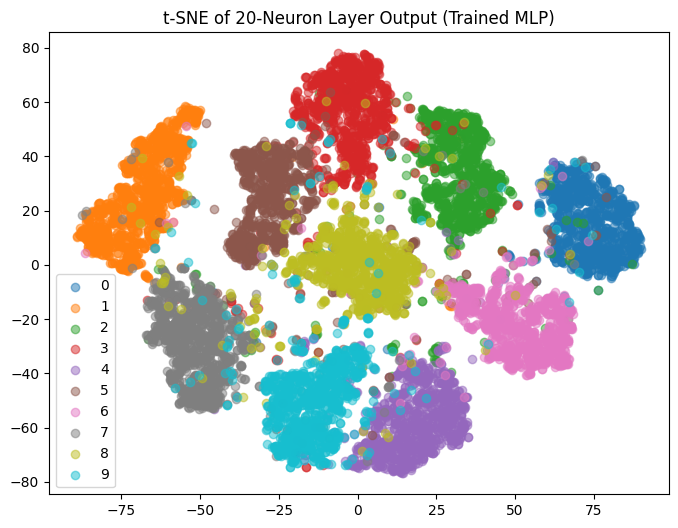

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract second-layer embeddings (20-neuron output)
def get_embeddings(model, test_loader):
    model.eval()
    embeddings = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            x = images.view(-1, 28*28)
            x = torch.relu(model.fc1(x))
            x = torch.relu(model.fc2(x))  # Extract 20-neuron layer output
            embeddings.append(x)
            all_labels.extend(labels.numpy())

    embeddings = torch.cat(embeddings).numpy()
    return embeddings, np.array(all_labels)

# t-SNE visualization for trained model
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8,6))
    for i in range(10):
        indices = labels == i
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=str(i), alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.show()

embeddings, test_labels = get_embeddings(model, test_loader)
plot_tsne(embeddings, test_labels, "t-SNE of 20-Neuron Layer Output (Trained MLP)")


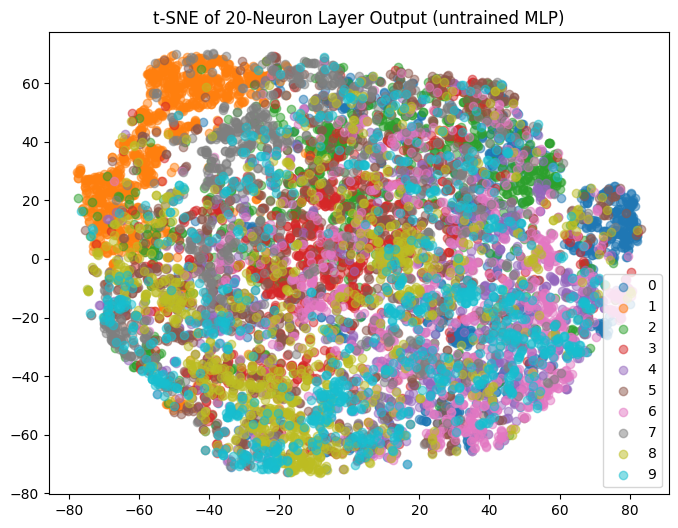

In [8]:

untrained_model=MLP()
embeddings, test_labels = get_embeddings(untrained_model, test_loader)
plot_tsne(embeddings, test_labels, "t-SNE of 20-Neuron Layer Output (untrained MLP)")


In [15]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor()])


fashion_mnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


fashion_test_loader = DataLoader(fashion_mnist_test, batch_size=64, shuffle=False)


In [16]:

fashion_preds, fashion_labels = evaluate_model(model, fashion_test_loader)


In [17]:
from sklearn.metrics import confusion_matrix, f1_score


f1_fashion = f1_score(fashion_labels, fashion_preds, average='macro')
conf_matrix_fashion = confusion_matrix(fashion_labels, fashion_preds)

print(f"Fashion-MNIST F1-score: {f1_fashion}")
print(f"Confusion Matrix:\n{conf_matrix_fashion}")


Fashion-MNIST F1-score: 0.034992137867644234
Confusion Matrix:
[[ 88  91 810  88 788 202 622  28 561   5]
 [  0   1   0   0   0   1   0   0   0   0]
 [110 426  26 361  17 395  54 518 110 739]
 [398 400  28 177  24  44 116   6   6  93]
 [  2   0   2   1   1  99   0 230   4   3]
 [ 37   4  71  21  26  67  22   2 132  25]
 [  6   0  24  15  26 134   9 202 138  14]
 [  1   1   2   0   1   8   0   0  14   0]
 [353  57  35 336 116  50 173  11  28 118]
 [  5  20   2   1   1   0   4   3   7   3]]


In [18]:

fashion_embeddings, fashion_test_labels = get_embeddings(model, fashion_test_loader)


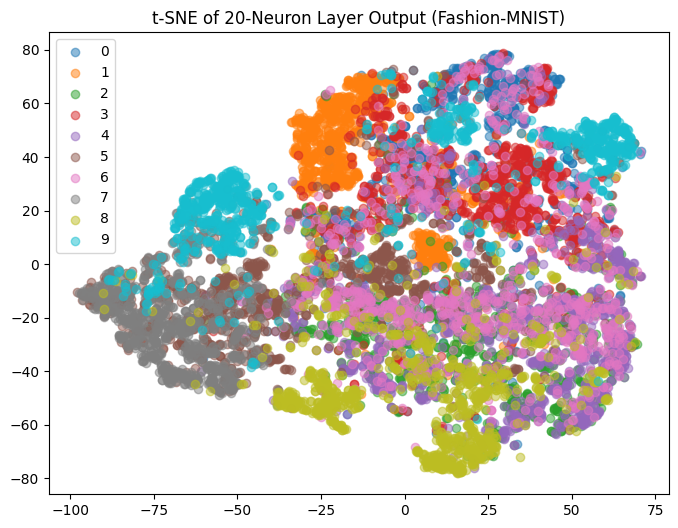

In [19]:

plot_tsne(fashion_embeddings, fashion_test_labels, "t-SNE of 20-Neuron Layer Output (Fashion-MNIST)")
